In [1]:
from fbprophet import Prophet
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
akarsu_df = pd.read_csv('../RelevantData/akarsu_relevant.csv', parse_dates = ['Tarih'], index_col = 'Tarih')

In [3]:
# Removing Toplam_Pestisit column because 90% of it is empty.
akarsu_df = akarsu_df.drop(columns = 'Toplam_Pestisit')
# Dropping missing features
akarsu_df = akarsu_df.dropna()
# Manually correcting dates of two samples
akarsu_df.index = akarsu_df.index.str.replace("28:.12.2016", "28.12.2016", regex = True)
akarsu_df.index = akarsu_df.index.str.replace("22.009.2016", "22.09.2016", regex = True)

In [4]:
akarsu_cols = ['Fekal_Koliform', 'Toplam_Koliform', 'Toplam_Fosfor', 'Toplam_Kjeldahl_Azotu', 'Kimyasal_Oksijen_İhtiyacı', 'Nitrat_Azotu', 'Çözünmüş_Oksijen']

In [5]:
df = akarsu_df
df['chunkID'] = akarsu_df.groupby('Numune_Adı').ngroup()
df = df.drop(labels = ['Numune_Adı'], axis = 1)
df = df.sort_values(by=['chunkID', 'Tarih'])
df.index = pd.to_datetime(df.index, yearfirst = True)

In [17]:
recurrence = pd.DataFrame(df['chunkID'].value_counts())
recurrence

,chunkID
96,74
43,74
95,74
29,72
30,72
...,...
54,4
93,3
88,1
158,1


In [7]:
c43 = df.loc[df['chunkID'] == 43]

In [8]:
c43

,Fekal_Koliform,Toplam_Koliform,Toplam_Fosfor,Toplam_Kjeldahl_Azotu,Kimyasal_Oksijen_İhtiyacı,Nitrat_Azotu,Çözünmüş_Oksijen,chunkID
Tarih,,,,,,,,
2009-01-24,2500.00000,3000.00000,0.37800,0.60000,5.00000,1.36000,80.30000,43
2009-02-13,900.00000,2000.00000,0.21500,0.60000,10.20000,3.22000,84.20000,43
2009-03-13,1600.00000,2800.00000,0.19300,0.67000,9.99990,2.61000,101.00000,43
2009-04-07,700.00000,2800.00000,0.12100,0.75000,9.99990,3.40000,84.70000,43
2009-05-08,1000.00000,2500.00000,0.32700,1.51000,17.00000,2.53000,79.60000,43
2009-06-08,800.00000,2400.00000,0.05800,1.02000,14.40000,3.13000,72.00000,43
2009-07-08,900.00000,2400.00000,0.05000,2.13000,10.40000,2.75000,85.40000,43
2009-08-15,500.00000,2000.00000,0.05800,1.32000,16.40000,3.52000,73.10000,43
2009-09-15,800.00000,2200.00000,0.03000,2.01000,9.99990,1.65000,73.10000,43


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

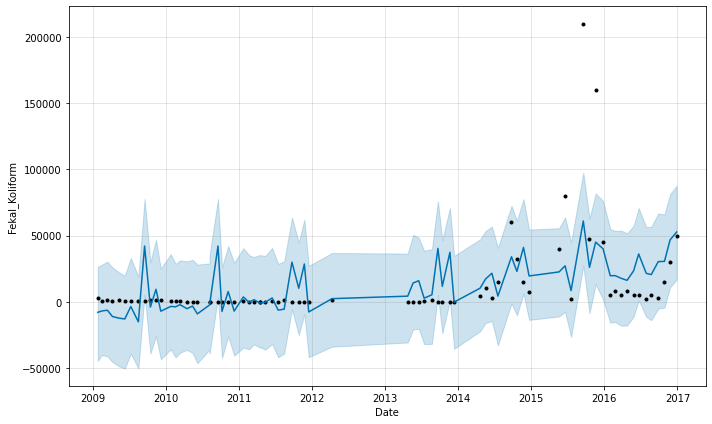

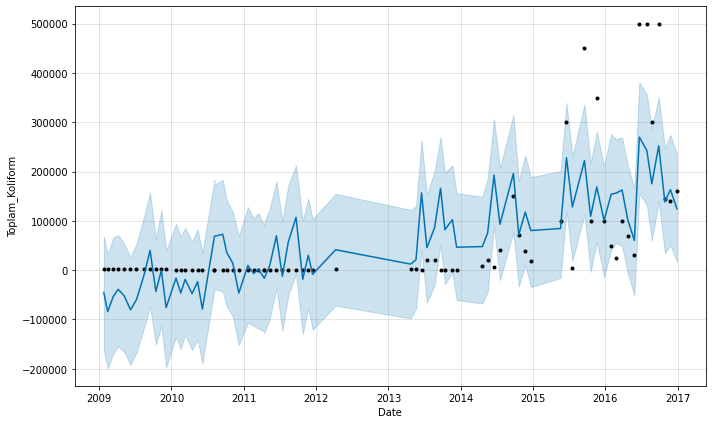

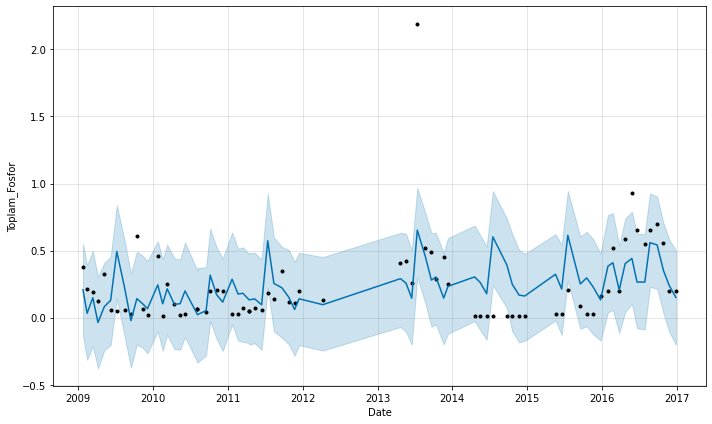

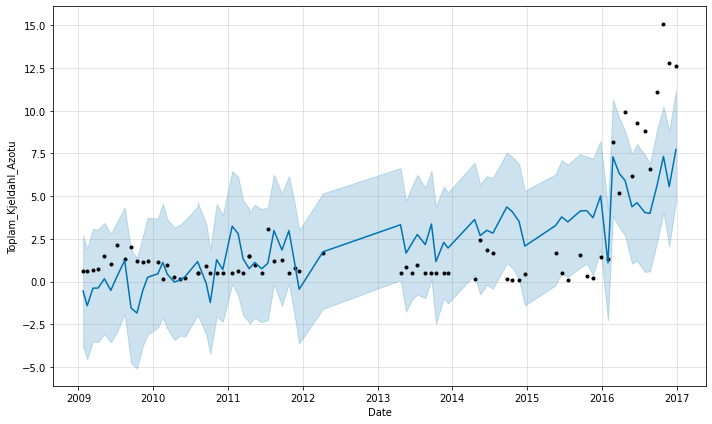

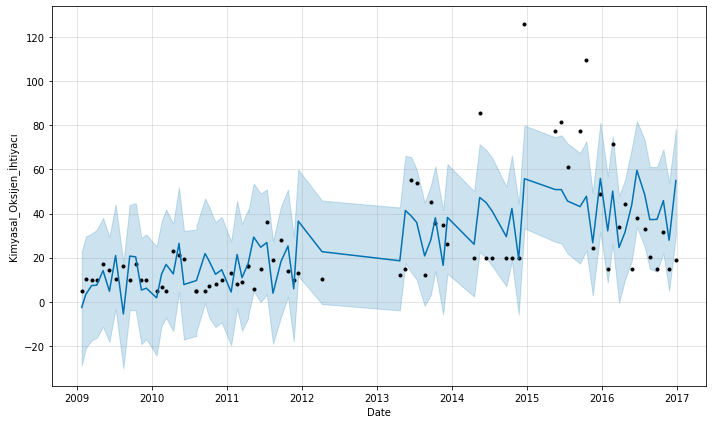

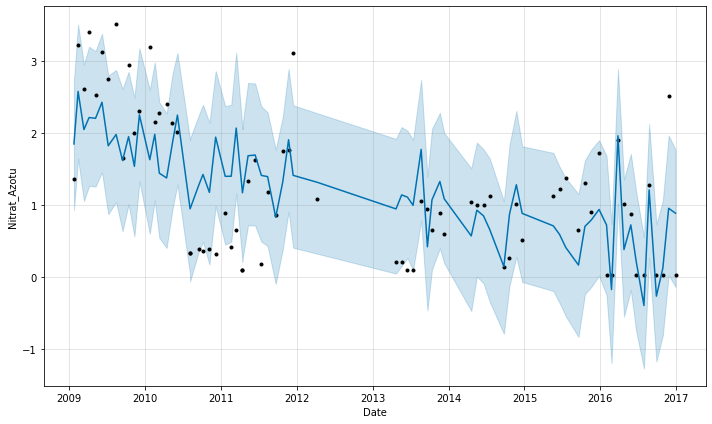

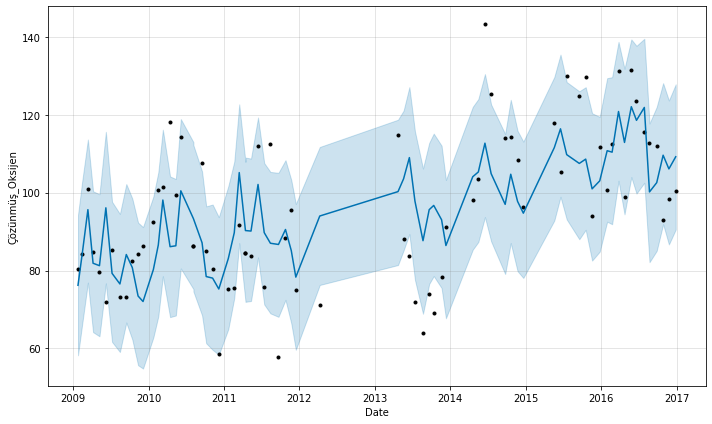

In [9]:
frlist = []
for i in akarsu_cols:
    f = c43[[i]].reset_index()
    fa = f.rename(columns={'Tarih': 'ds', i: 'y'})
    fa = fa.dropna()
    m = Prophet()
    m.fit(fa)
    forecast = m.predict(fa)
    frlist.append(forecast)
    fig1 = m.plot(forecast, xlabel = 'Date', ylabel = i)

In [12]:
for i in range(len(akarsu_cols)):
    display(frlist[i][['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

,ds,yhat,yhat_lower,yhat_upper
0,2009-01-24,-8005.89074,-44766.04714,26523.13446
1,2009-02-13,-7003.34694,-40251.18767,27849.56740
2,2009-03-13,-6426.18896,-41281.43344,30330.21642
3,2009-04-07,-11166.26594,-45498.29282,25922.34604
4,2009-05-08,-12342.72842,-48659.96396,22349.43002
5,2009-06-08,-13052.11316,-50484.48222,19606.10214
6,2009-07-08,-3640.63919,-39181.21993,32984.13440
7,2009-08-15,-15216.23936,-50411.03739,18897.56051
8,2009-09-15,42065.07928,5218.27619,77702.60759
9,2009-10-14,-4041.52396,-39106.51781,29733.49981


,ds,yhat,yhat_lower,yhat_upper
0,2009-01-24,-45393.03609,-162428.77417,68724.57456
1,2009-02-13,-84080.21154,-199534.90252,32594.29727
2,2009-03-13,-53362.51446,-169151.02959,66446.66966
3,2009-04-07,-38826.50992,-154185.33508,70909.32907
4,2009-05-08,-52427.79972,-166343.02249,52920.95591
5,2009-06-08,-80397.59724,-191689.29665,27175.13586
6,2009-07-08,-60040.81432,-167626.48084,53748.30952
7,2009-08-15,-10532.84984,-117546.61790,108414.75658
8,2009-09-15,40076.81457,-74155.49332,157637.75364
9,2009-10-14,-43294.86864,-151281.12547,62620.12845


,ds,yhat,yhat_lower,yhat_upper
0,2009-01-24,0.20746,-0.13593,0.55031
1,2009-02-13,0.03249,-0.31353,0.39158
2,2009-03-13,0.14897,-0.21175,0.49801
3,2009-04-07,-0.03627,-0.37923,0.30267
4,2009-05-08,0.08196,-0.24277,0.40929
5,2009-06-08,0.12973,-0.20454,0.45346
6,2009-07-08,0.49316,0.14257,0.83779
7,2009-08-15,0.22410,-0.13888,0.57705
8,2009-09-15,-0.02220,-0.37397,0.32844
9,2009-10-14,0.14190,-0.19977,0.49176


,ds,yhat,yhat_lower,yhat_upper
0,2009-01-24,-0.55163,-3.84281,2.68436
1,2009-02-13,-1.41375,-4.53439,1.93223
2,2009-03-13,-0.38811,-3.50442,3.08177
3,2009-04-07,-0.38026,-3.53898,3.05267
4,2009-05-08,0.16736,-3.07009,3.43225
5,2009-06-08,-0.51646,-3.56465,2.78816
6,2009-07-08,0.28826,-2.96389,3.47543
7,2009-08-15,1.23966,-1.89772,4.32717
8,2009-09-15,-1.55028,-4.76860,1.86557
9,2009-10-14,-1.84093,-5.09283,1.35932


,ds,yhat,yhat_lower,yhat_upper
0,2009-01-24,-2.55034,-28.76299,22.69245
1,2009-02-13,3.37545,-20.93164,29.56072
2,2009-03-13,7.37080,-17.50986,30.86377
3,2009-04-07,7.52946,-16.33603,32.58041
4,2009-05-08,14.13537,-11.24475,37.94633
5,2009-06-08,4.79621,-18.23846,29.46074
6,2009-07-08,20.96128,-3.07947,44.08692
7,2009-08-15,-5.48819,-30.21990,17.96045
8,2009-09-15,20.71293,-3.74389,43.83478
9,2009-10-14,20.36998,-3.80155,44.68841


,ds,yhat,yhat_lower,yhat_upper
0,2009-01-24,1.84897,0.93211,2.73192
1,2009-02-13,2.57841,1.64356,3.50702
2,2009-03-13,2.04882,1.05605,2.95313
3,2009-04-07,2.21592,1.26592,3.19952
4,2009-05-08,2.20509,1.25847,3.13663
5,2009-06-08,2.42871,1.45568,3.38056
6,2009-07-08,1.82360,0.87338,2.79733
7,2009-08-15,1.98069,1.04120,2.87527
8,2009-09-15,1.61849,0.63788,2.61099
9,2009-10-14,1.95073,1.00988,2.85088


,ds,yhat,yhat_lower,yhat_upper
0,2009-01-24,76.21589,58.23550,94.29472
1,2009-02-13,84.08319,66.12833,102.76933
2,2009-03-13,95.63229,76.90363,113.64473
3,2009-04-07,81.87484,64.18629,100.35488
4,2009-05-08,81.24691,63.11502,99.58585
5,2009-06-08,96.10549,76.70792,115.62870
6,2009-07-08,79.27774,61.67091,97.65666
7,2009-08-15,76.55679,59.08199,94.53696
8,2009-09-15,84.11262,66.65026,102.21494
9,2009-10-14,80.77368,62.28575,98.50677
